In [1]:
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ticker = "^DJI"
 
df = web.DataReader(name = ticker, data_source = "yahoo", start = "01-01-1992")

fig = make_subplots(shared_xaxes = True,
                    vertical_spacing = 0.03,
                    subplot_titles = ((ticker + ' Moving Averages', "Volume")),
                    specs = [[{"secondary_y": True}]])

fig.add_trace(go.Candlestick(x = df.index,
                             open = df.Open,
                             close = df.Close,
                             low = df.Low,
                             high = df.High,
                             name = ticker,
                             showlegend = True),
              secondary_y = True)

fig.add_trace(go.Scatter(x = df.index,
                         y = df.Close.rolling(window = 200, min_periods = 1).mean(),
                         mode = "lines",
                         line = {"width": 1, "color": "blue"},
                         name = '200 SMA'),
              secondary_y = True)

fig.add_trace(go.Scatter(x = df.index,
                         y = df.Close.rolling(window = 50, min_periods = 1).mean(),
                         mode = "lines",
                         line = {"width": 1, "color": "red"},
                         name = '50 SMA'),
              secondary_y = True)

fig.add_trace(go.Bar(x = df.index,
                     y = df.Volume,
                     name = "Daily Volume"),
              secondary_y = False)

fig.update_layout(yaxis1 = {"side": "right", "showgrid": False},
                  yaxis2 = {"side": "left"});
fig.show()

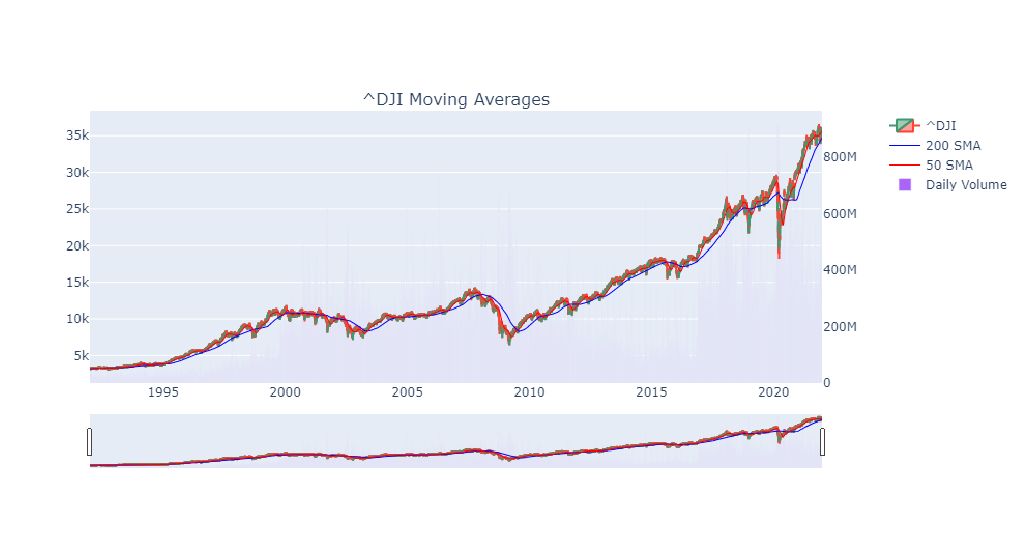

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("DOW.png")
plt.figure(figsize = (20, 10))
plt.axis("off")
plt.imshow(img)